<a href="https://colab.research.google.com/github/joeldsouza2001/ML/blob/main/flight_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dt = pd.read_excel('/content/Data_Train.xlsx')
dt2 = dt.copy()


In [4]:
dt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
dt.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Handling missing data

In [7]:
dt.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

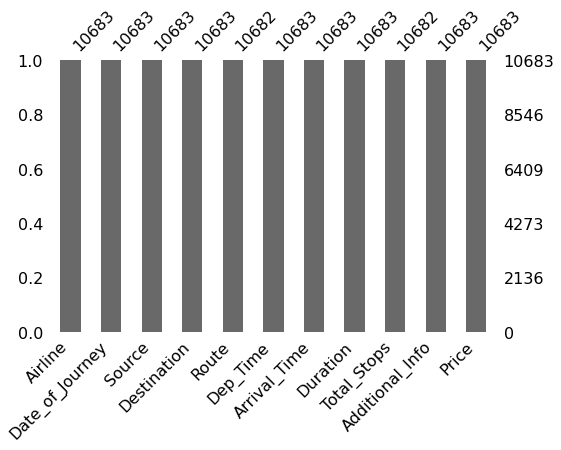

In [8]:
import missingno
missingno.bar(dt,figsize=(8,5))


In [9]:
#Dropping missing data

dt.dropna(inplace=True)

In [10]:
dt.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
dt.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
lst = ['Dep_Time','Arrival_Time','Date_of_Journey']

In [13]:
for i in lst:
  dt[i] = pd.to_datetime(dt[i])

In [14]:
dt.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
dt.head(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-11-01 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-01 05:50:00,2021-11-01 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-01 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-11-01 18:05:00,2021-11-01 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-11-01 16:50:00,2021-11-01 21:35:00,4h 45m,1 stop,No info,13302
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2021-11-01 09:00:00,2021-11-01 11:25:00,2h 25m,non-stop,No info,3873
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2021-11-01 18:55:00,2021-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2021-11-01 08:00:00,2021-03-02 05:05:00,21h 5m,1 stop,No info,22270


In [16]:
dt['Journey_date'] = dt['Date_of_Journey'].dt.day
dt['Journey_month'] = dt['Date_of_Journey'].dt.month

In [17]:
dt.drop('Date_of_Journey',axis=1,inplace=True)

In [18]:
dt.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-11-01 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-01 05:50:00,2021-11-01 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-01 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9


In [19]:
dt['Dep_hour'] = dt['Dep_Time'].dt.hour
dt['Dep_min'] = dt['Dep_Time'].dt.minute

dt['Arr_hour'] = dt['Arrival_Time'].dt.hour
dt['Arr_min'] = dt['Arrival_Time'].dt.minute

dt.drop('Arrival_Time',axis=1,inplace=True)
dt.drop('Dep_Time',axis=1,inplace=True)

In [20]:
dt.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [21]:
def duration_col(col):
  print(col)
  if(len(col.split(' '))==2):
    return col
  else:
    if 'h' in col:
      return col+' 00m'
    else:
      return '00h '+col[0]

In [22]:
dt['Duration'] = dt['Duration'].apply(duration_col)


Streaming output truncated to the last 5000 lines.
26h 35m
11h 50m
7h 20m
1h 25m
2h 50m
2h 15m
2h 55m
3h
16h 50m
24h 50m
16h 5m
2h 20m
13h 20m
7h 30m
18h 20m
2h 50m
25h 35m
1h 35m
21h 25m
38h 35m
2h 55m
27h 40m
27h 35m
11h 15m
1h 25m
12h
1h 30m
1h 30m
15h 50m
37h 25m
8h 25m
26h 20m
10h 25m
10h 25m
2h 15m
8h 55m
14h 45m
7h 15m
12h 35m
3h
2h 35m
2h 55m
9h 30m
7h 35m
2h 25m
7h 20m
6h 25m
26h 10m
9h 15m
8h 25m
11h
3h
19h 25m
5h 25m
2h 50m
2h 45m
8h 20m
2h 15m
8h
2h 40m
1h 30m
12h 35m
1h 15m
10h 25m
3h
23h 55m
16h 5m
5h 20m
24h 35m
4h 55m
6h 10m
1h 30m
2h 20m
5h 15m
7h 5m
12h 30m
2h 45m
6h 15m
20h
3h 15m
8h
7h 40m
13h 30m
22h 45m
2h 35m
22h 45m
10h 15m
13h 30m
2h 30m
5h 15m
6h 35m
16h 5m
3h
9h 50m
23h
2h 50m
5h 20m
11h
14h 50m
23h 30m
36h 10m
20h 55m
3h 15m
3h 15m
9h 20m
5h 15m
1h 30m
7h 30m
2h 35m
14h 20m
21h 20m
10h 30m
24h 45m
3h 15m
22h 15m
27h 20m
6h
2h 50m
7h 50m
5h
3h 15m
2h 50m
2h 40m
21h 55m
8h 40m
1h 30m
15h 30m
8h 40m
6h 20m
5h 35m
12h 30m
2h 50m
11h 35m
3h 5m
26h 30m
9h
2h 45m
1

In [23]:
dt.head(6)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 00m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25


In [24]:
def duration_to_hour_split(col):
  return int(col.split(' ')[0][0:1])
  

def duration_to_min_split(col):
  return int(col.split(' ')[1][0:1])

In [25]:
dt['Duration_hour'] = dt['Duration'].apply(duration_to_hour_split)
dt['Duration_min'] = dt['Duration'].apply(duration_to_min_split)

In [26]:
dt.tail(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25,2,3
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,2,3
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 00m,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10,2,4
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,5,9,10,55,19,15,8,2


In [27]:
dt.drop('Duration',axis=1,inplace=True)

In [28]:
dt.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_date        int64
Journey_month       int64
Dep_hour            int64
Dep_min             int64
Arr_hour            int64
Arr_min             int64
Duration_hour       int64
Duration_min        int64
dtype: object

In [29]:
categorical_val = [col for col in dt.columns if dt[col].dtypes=='O' ]

In [30]:
categorical_val

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [31]:
nums_val = [col for col in dt.columns if dt[col].dtypes!='O']

In [32]:
nums_val

['Price',
 'Journey_date',
 'Journey_month',
 'Dep_hour',
 'Dep_min',
 'Arr_hour',
 'Arr_min',
 'Duration_hour',
 'Duration_min']

# Categorical values

In [33]:
dt['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

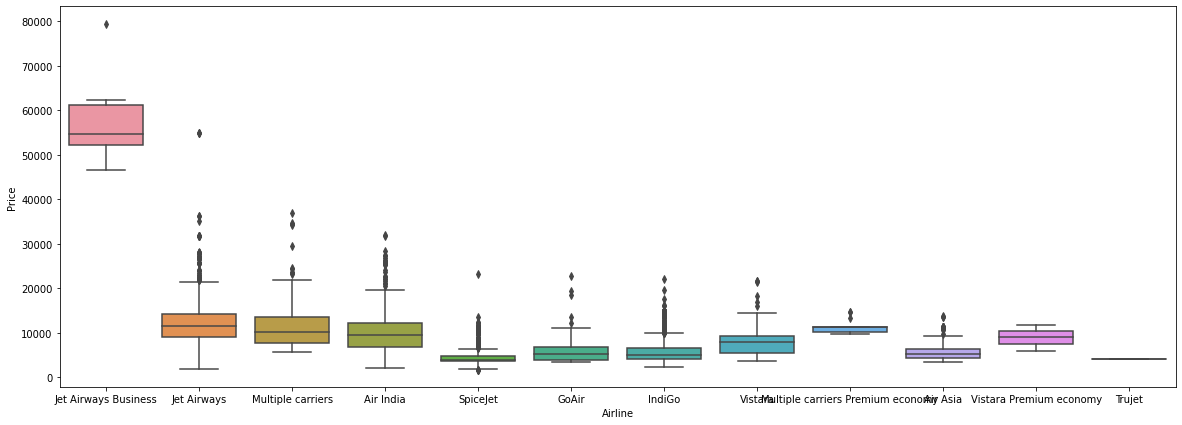

In [34]:
plt.figure(figsize=(20,7))

sns.boxplot(x='Airline',y='Price',data=dt.sort_values('Price',ascending=False))

In [35]:
dummies = pd.get_dummies(dt['Airline'],drop_first=True,prefix='Airline')
dt = pd.concat([dt,dummies],axis=1)
dt.drop('Airline',axis=1,inplace=True)

In [36]:
dt.head(5)

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,4,0,0,1,0,0,0,0,0,0,0,0


In [37]:
dt['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

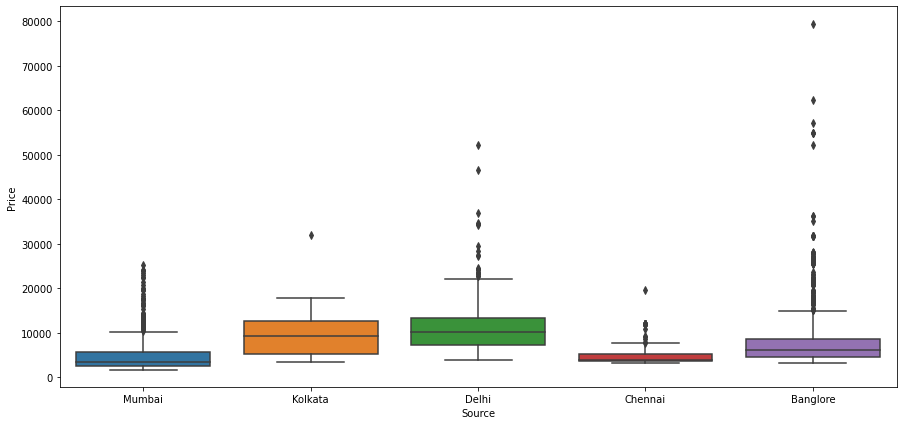

In [38]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Source',y='Price',data=dt.sort_values('Source',ascending=False))

In [39]:
dummy = pd.get_dummies(dt['Source'],drop_first=True,prefix='Source')

dt = pd.concat([dt,dummy],axis=1)

dt.drop('Source',axis=1,inplace=True)

In [40]:
dt.head(4)

,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


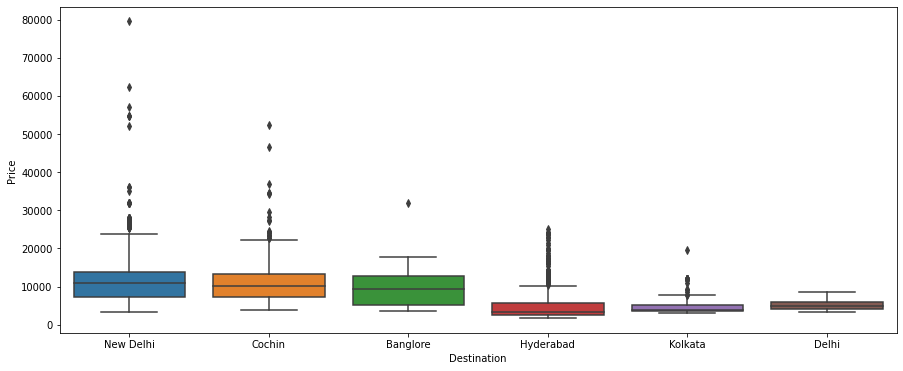

In [41]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Destination',y='Price',data=dt.sort_values('Price',ascending=False))

In [42]:
dummy = pd.get_dummies(dt['Destination'],drop_first=True,prefix='Destination')

dt = pd.concat([dt,dummy],axis=1)

dt.drop('Destination',axis=1,inplace=True)

In [43]:
dt.head(4)

,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [44]:
dt['Route'].dtype

dtype('O')

In [45]:
dt['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → CCU → HYD                   1
BOM → JAI → DEL → HYD             1
BLR → HBX → BOM → NAG → DEL       1
BOM → RPR → VTZ → HYD             1
CCU → RPR → HYD → BLR             1
Name: Route, Length: 128, dtype: int64

In [46]:
dt['Route1']=dt['Route'].str.split('→').str[0]
dt['Route2']=dt['Route'].str.split('→').str[1]
dt['Route3']=dt['Route'].str.split('→').str[2]
dt['Route4']=dt['Route'].str.split('→').str[3]
dt['Route5']=dt['Route'].str.split('→').str[4]

In [47]:
dt.head(4)

,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU,NAG,BLR,NaN,NaN


In [48]:
dt.drop('Route',axis=1,inplace=True)

In [49]:
dt.head(4)

,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,non-stop,No info,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,BLR,DEL,NaN,NaN,NaN
1,2 stops,No info,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU,IXR,BBI,BLR,NaN
2,2 stops,No info,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,DEL,LKO,BOM,COK,NaN
3,1 stop,No info,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU,NAG,BLR,NaN,NaN


In [50]:
dt.isnull().sum()

Total_Stops                                      0
Additional_Info                                  0
Price                                            0
Journey_date                                     0
Journey_month                                    0
Dep_hour                                         0
Dep_min                                          0
Arr_hour                                         0
Arr_min                                          0
Duration_hour                                    0
Duration_min                                     0
Airline_Air India                                0
Airline_GoAir                                    0
Airline_IndiGo                                   0
Airline_Jet Airways                              0
Airline_Jet Airways Business                     0
Airline_Multiple carriers                        0
Airline_Multiple carriers Premium economy        0
Airline_SpiceJet                                 0
Airline_Trujet                 

In [51]:
dt.fillna('None',inplace=True)

In [52]:
dt.isnull().sum()

Total_Stops                                  0
Additional_Info                              0
Price                                        0
Journey_date                                 0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arr_hour                                     0
Arr_min                                      0
Duration_hour                                0
Duration_min                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vista

In [53]:
dt.head()

,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,non-stop,No info,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,BLR,DEL,None,None,None
1,2 stops,No info,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU,IXR,BBI,BLR,None
2,2 stops,No info,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,DEL,LKO,BOM,COK,None
3,1 stop,No info,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU,NAG,BLR,None,None
4,1 stop,No info,13302,3,1,16,50,21,35,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,BLR,NAG,DEL,None,None


In [54]:
dt['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [55]:
dt.drop('Additional_Info',axis=1,inplace=True)

In [56]:
from sklearn.preprocessing import LabelEncoder

enco = LabelEncoder()

for i in ['Route1','Route2','Route3','Route4','Route5']:
  dt[i] = enco.fit_transform(dt[i])


In [57]:
dt.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,non-stop,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13,29,13,5
1,2 stops,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,25,1,3,5
2,2 stops,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,32,4,5,5
3,1 stop,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,34,3,13,5
4,1 stop,13302,3,1,16,50,21,35,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,34,8,13,5


In [58]:
dt['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [59]:
total_stops_dict = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

dt['Total_Stops'] = dt['Total_Stops'].map(total_stops_dict)

In [60]:
dt.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,0,3897,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13,29,13,5
1,2,7662,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,25,1,3,5
2,2,13882,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,32,4,5,5
3,1,6218,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,34,3,13,5
4,1,13302,3,1,16,50,21,35,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,34,8,13,5


In [61]:
Q1 = dt['Price'].quantile(0.25)
Q2 = dt['Price'].quantile(0.5)
Q3 = dt['Price'].quantile(0.75)
Q1,Q3

(5277.0, 12373.0)

In [62]:
IQR = Q3-Q1
IQR

7096.0

In [63]:
low = Q1 - 1.5*IQR
hig = Q3 + 1.5*IQR

low,hig

(-5367.0, 23017.0)

In [64]:
outlier = dt[(dt['Price']<low)|(dt['Price']>hig)]

In [65]:
dt3 = dt.copy()

In [66]:
dt3.drop(outlier.index,inplace=True)

In [67]:
dt['Price'] = np.where(dt['Price']>=40000,dt['Price'].median(),dt['Price'])

In [68]:
dt.describe()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9046.090994,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,2.803688,2.887193,0.163921,0.018161,0.192192,0.360326,0.000562,0.111964,0.001217,0.076577,0.000094,0.044842,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250,2.019378,11.897959,13.232166,11.792080,4.983056
std,0.675229,4387.489557,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,2.312156,1.625189,0.370221,0.133541,0.394042,0.480117,0.023695,0.315337,0.034866,0.265932,0.009676,0.206966,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214,1.206239,8.006427,11.302632,2.948124,0.263913
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,4.000000,13.000000,5.000000
50%,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000,6.000000,13.000000,5.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,3.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,14.000000,29.000000,13.000000,5.000000
max,4.000000,36983.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,9.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,44.000000,29.000000,13.000000,5.000000


In [69]:
dt3.describe()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
count,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.0,10588.000000,10588.000000,10588.000000,10588.000000,10588.00000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000
mean,0.821402,8897.795618,12.761617,5.566396,12.490839,24.326596,13.358519,24.692577,2.797696,2.886192,0.163959,0.018323,0.193899,0.357669,0.0,0.112014,0.001228,0.077163,0.000094,0.04524,0.000283,0.035984,0.426898,0.271062,0.065357,0.426898,0.119475,0.065357,0.035984,0.081224,2.032112,11.918020,13.277201,11.791084,4.982905
std,0.676368,4069.289138,8.796903,2.973710,5.744769,18.728972,6.855228,16.532637,2.307451,1.626846,0.370256,0.134122,0.395369,0.479337,0.0,0.315398,0.035020,0.266862,0.009718,0.20784,0.016831,0.186259,0.494651,0.444529,0.247166,0.494651,0.324362,0.247166,0.186259,0.273192,1.199205,8.004561,11.334917,2.951641,0.265077
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5228.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,4.000000,13.000000,5.000000
50%,1.000000,8355.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000,6.000000,13.000000,5.000000
75%,1.000000,12312.500000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,3.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,14.000000,29.000000,13.000000,5.000000
max,4.000000,23001.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,9.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,44.000000,29.000000,13.000000,5.000000


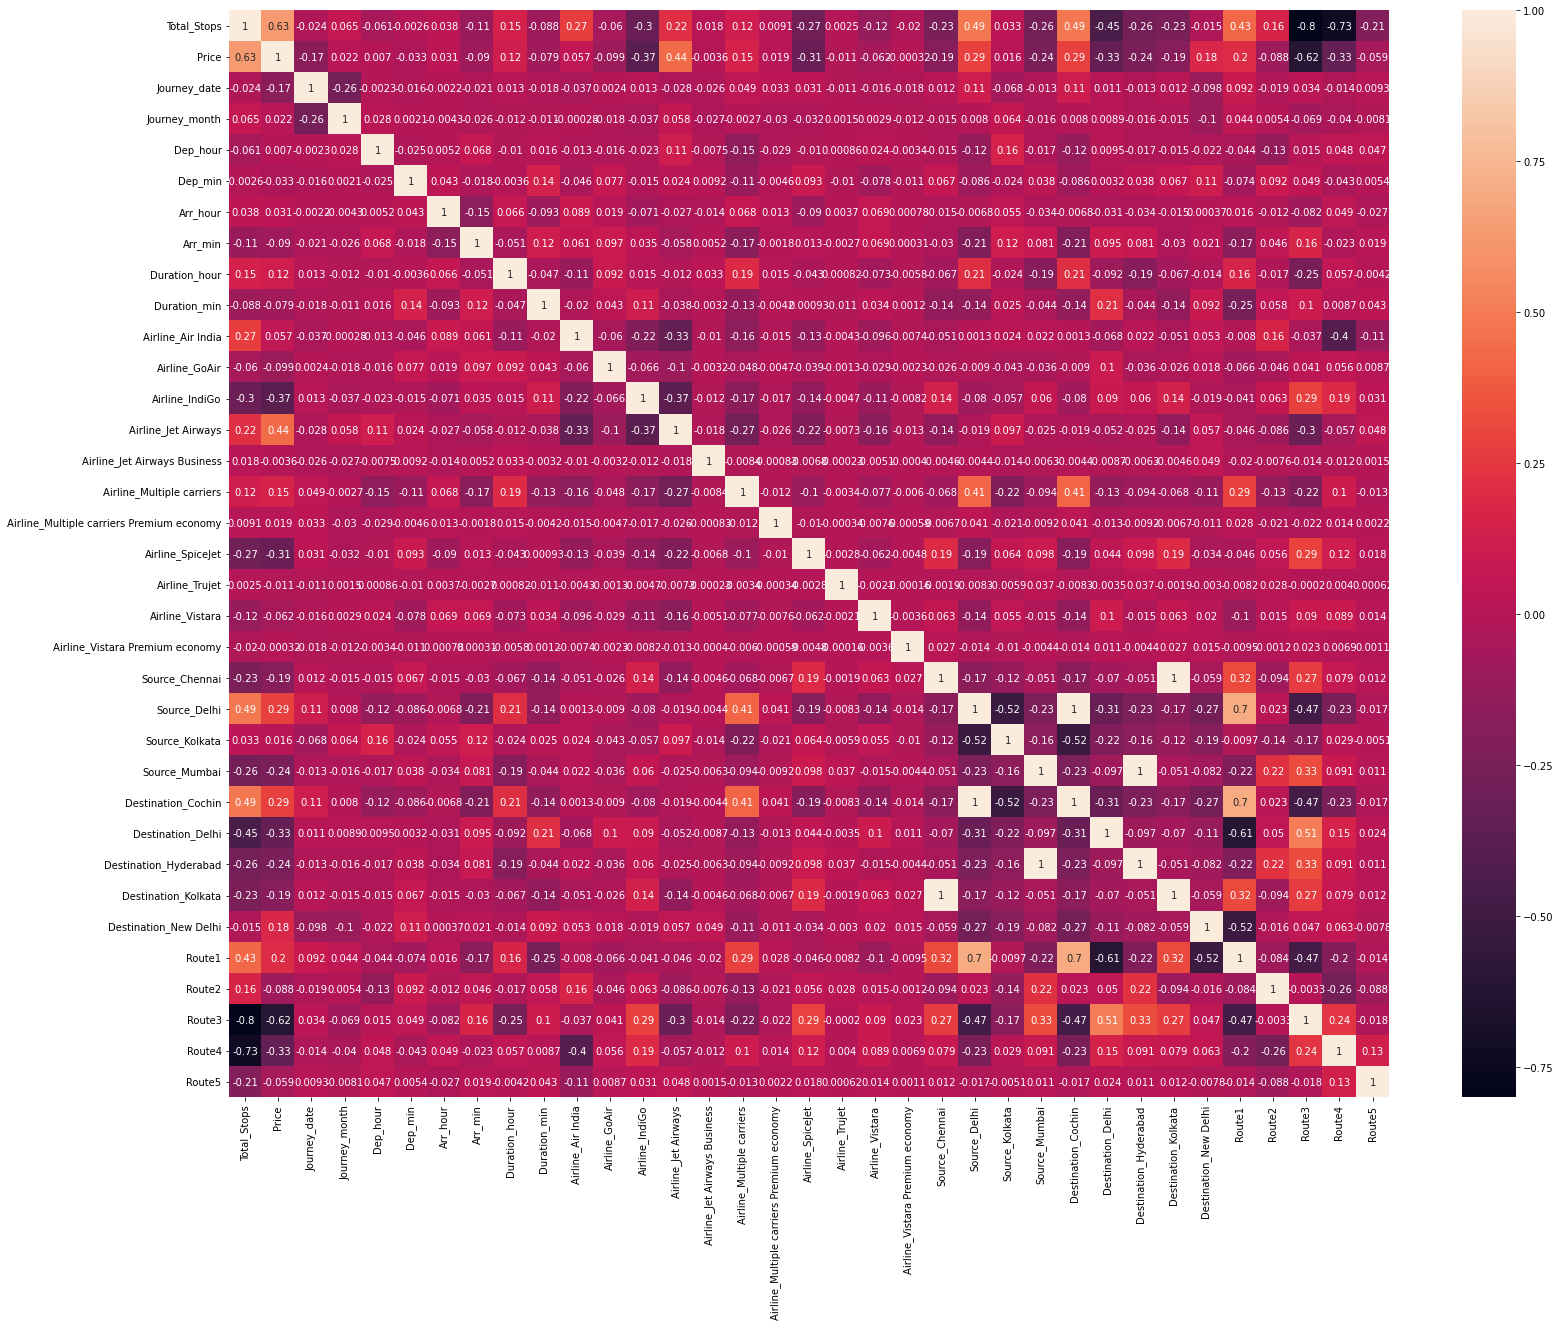

In [70]:
plt.figure(figsize=(26,20))
sns.heatmap(dt.corr(),annot=True)

In [71]:
dt.corr(method ='pearson')

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
Total_Stops,1.000000,0.629704,-0.024136,0.065495,-0.061476,-0.002618,0.038140,-0.106940,0.148441,-0.088119,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302,0.428918,0.162259,-0.800261,-0.729391,-0.207433
Price,0.629704,1.000000,-0.166965,0.022040,0.006999,-0.032789,0.030714,-0.090363,0.122269,-0.078673,0.057157,-0.098735,-0.374937,0.438216,-0.003642,0.150260,0.018878,-0.309010,-0.010820,-0.061720,-0.000320,-0.186573,0.289010,0.015518,-0.240063,0.289010,-0.325987,-0.240063,-0.186573,0.175353,0.202811,-0.088033,-0.616544,-0.332204,-0.059084
Journey_date,-0.024136,-0.166965,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,0.012874,-0.018270,-0.037279,0.002350,0.013223,-0.028387,-0.026075,0.048638,0.032978,0.030767,-0.010643,-0.015935,-0.017801,0.012202,0.112092,-0.068380,-0.013391,0.112092,0.011489,-0.013391,0.012202,-0.098370,0.092303,-0.019274,0.034427,-0.013889,0.009293
Journey_month,0.065495,0.022040,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,-0.011584,-0.011447,-0.000281,-0.017538,-0.037203,0.057818,-0.026727,-0.002737,-0.029617,-0.032454,0.001507,0.002856,-0.012351,-0.014993,0.008017,0.063601,-0.015696,0.008017,0.008880,-0.015696,-0.014993,-0.100533,0.044173,0.005444,-0.069195,-0.039960,-0.008100
Dep_hour,-0.061476,0.006999,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,-0.010237,0.015719,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138,-0.044414,-0.126213,0.014986,0.047505,0.047014
Dep_min,-0.002618,-0.032789,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.003568,0.143940,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129,-0.073977,0.091579,0.049031,-0.043000,0.005445
Arr_hour,0.038140,0.030714,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.066076,-0.093116,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366,0.015895,-0.012224,-0.081793,0.048578,-0.026987
Arr_min,-0.106940,-0.090363,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.051389,0.117288,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271,-0.172995,0.045967,0.159993,-0.022571,0.019213
Duration_hour,0.148441,0.122269,0.012874,-0.011584,-0.010237,-0.003568,0.066076,-0.051389,1.000000,-0.046855,-0.108745,0.092204,0.014698,-0.012347,0.032774,0.187193,0.014578,-0.042545,0.000822,-0.073165,-0.005826,-0.066852,0.207942,-0.023691,-0.186440,0.207942,-0.092315,-0.186440,-0.066852,-0.014210,0.158937,-0.017463,-0.249220,0.056807,-0.004224
Duration_min,-0.088119,-0.078673,-0.018270,-0.011447,0.015719,0.143940,-0.093116,0.117288,-0.046855,1.000000,-0.019991,0.042658,0.107104,-0.037893,-0.003217,-0.128445,-0.004186,0.000926,-0.011236,0.033968,0.001163,-0.140712,-0.139188,0.024932,-0.043939,-0.139188,0.212641,-0.043939,-0.140712,0.092090,-0.248328,0.057512,0.103297,0.008705,0.042911


In [74]:
dtt


,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,0,3897.0,24,3,22,20,1,10,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13,29,13,5
1,2,7662.0,5,1,5,50,13,15,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,25,1,3,5
2,2,13882.0,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,32,4,5,5
3,1,6218.0,5,12,18,5,23,30,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,34,3,13,5
4,1,13302.0,3,1,16,50,21,35,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107.0,4,9,19,55,22,25,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,5,29,13,5
10679,0,4145.0,27,4,20,45,23,20,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,5,29,13,5
10680,0,7229.0,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13,29,13,5
10681,0,12648.0,3,1,11,30,14,10,2,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,13,29,13,5


In [113]:
from sklearn.feature_selection import SelectKBest, chi2


bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))

                                        Specs          Score
31                                     Route3  100796.014355
4                                     Dep_min   67490.957291
30                                     Route2   50145.014034
6                                     Arr_min   50089.870709
1                                Journey_date   26247.574989
5                                    Arr_hour   18706.779381
3                                    Dep_hour   10852.890961
17                             Airline_Trujet   10587.000000
19            Airline_Vistara Premium economy   10585.000000
15  Airline_Multiple carriers Premium economy   10575.000000
20                             Source_Chennai    9984.939248
27                        Destination_Kolkata    9984.939248
18                            Airline_Vistara    9973.067607
23                              Source_Mumbai    9690.895170
26                      Destination_Hyderabad    9690.895170
10                      

In [114]:
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))

                                        Specs          Score
31                                     Route3  100796.014355
4                                     Dep_min   67490.957291
30                                     Route2   50145.014034
6                                     Arr_min   50089.870709
1                                Journey_date   26247.574989
5                                    Arr_hour   18706.779381
3                                    Dep_hour   10852.890961
17                             Airline_Trujet   10587.000000
19            Airline_Vistara Premium economy   10585.000000
15  Airline_Multiple carriers Premium economy   10575.000000
20                             Source_Chennai    9984.939248
27                        Destination_Kolkata    9984.939248
18                            Airline_Vistara    9973.067607
23                              Source_Mumbai    9690.895170
26                      Destination_Hyderabad    9690.895170
10                      

In [115]:
from sklearn.model_selection import train_test_split
X3 = dt.drop('Price',axis=1)
y3 = dt['Price'] 

X1 = dt.drop('Price',axis=1)
y1 = dt['Price']

x1_train,x1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2)
x3_train,x3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.2)

In [110]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def predict(ml_model,X,y):
  
  x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
  model = ml_model.fit(x_train,y_train)

  preds = model.predict(x_test)
  print("MODEL NAME : "+str(ml_model))
  print('r2_score : '+str(r2_score(y_test,preds)))  
  print('MAE : '+str(mean_absolute_error(y_test,preds)))  
  print('MSE : '+str(mean_squared_error(y_test,preds)))  



In [111]:
from sklearn.ensemble import RandomForestRegressor

predict(RandomForestRegressor(),X1,y1)
predict(RandomForestRegressor(),X3,y3)


MODEL NAME : RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
r2_score : 0.8169347834972682
MAE : 1135.8987153027651
MSE : 3618644.7393787834
MODEL NAME : RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, 

TypeError: ignored

In [120]:
featureScores.describe()

,Score
count,33.000000
mean,16116.807900
std,21006.558550
min,96.529481
25%,7483.085597
50%,9203.641982
75%,10585.000000
max,100796.014355
